# Redshift Data of DESIJ0132-1600

Author: Anowar Shajib, S M Rafee Adnan

## Load data

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
from astropy.io import fits
from astropy.wcs import WCS

In [49]:
data, header = fits.getdata("DESIJ0132-1600_F140W_drz_sci.fits", header=True)

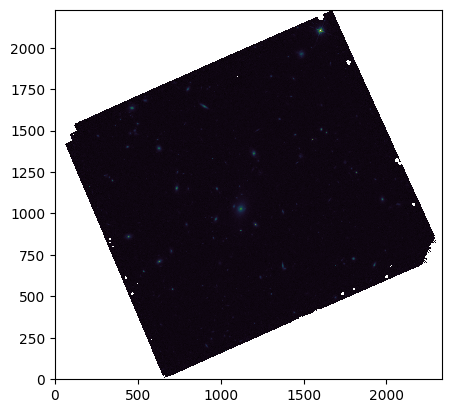

In [50]:
plt.imshow(np.log10(data), origin="lower", cmap="cubehelix", interpolation="nearest")

In [70]:
FILENAME = "photo_z_DESIJ0132-1600.csv"  # need to be changed for each cluster file
data_legacy = pd.read_csv(FILENAME, delimiter=",")
data_legacy

,_r,id,RAJ2000,DEJ2000,release,brickid,objid,type,pstar,gmmcomp,zphot,e_zphot,fclean,fqual
0,0.006597,8000239432003711,23.017077,-16.010474,8000,239432,3711,PSF,0.002,P9,0.715,0.319,1,1
1,0.006744,8000239432003820,23.023274,-16.006155,8000,239432,3820,EXP,0.001,E5,0.966,0.117,1,1
2,0.006940,8000239432003821,23.023010,-16.007202,8000,239432,3821,PSF,0.041,P5,0.772,0.536,0,0
3,0.000908,8000239432003828,23.015735,-16.004042,8000,239432,3828,DEV,0.038,D1,0.359,0.040,1,1
4,0.003644,8000239432003829,23.013675,-16.006127,8000,239432,3829,REX,0.003,R4,0.451,0.060,1,1
5,0.003438,8000239432003830,23.019052,-16.001328,8000,239432,3830,REX,0.004,R4,0.486,0.050,1,1
6,0.003170,8000239432003831,23.015742,-16.006932,8000,239432,3831,REX,0.001,R4,0.536,0.058,1,1
7,0.000191,8000239432003832,23.016709,-16.003702,8000,239432,3832,REX,0.000,R7,1.144,0.333,0,0
8,0.002085,8000239432003833,23.015590,-16.002080,8000,239432,3833,REX,0.001,R6,0.837,0.081,0,0
9,0.001353,8000239432003834,23.016302,-16.002582,8000,239432,3834,PSF,0.002,P7,0.611,0.319,0,0


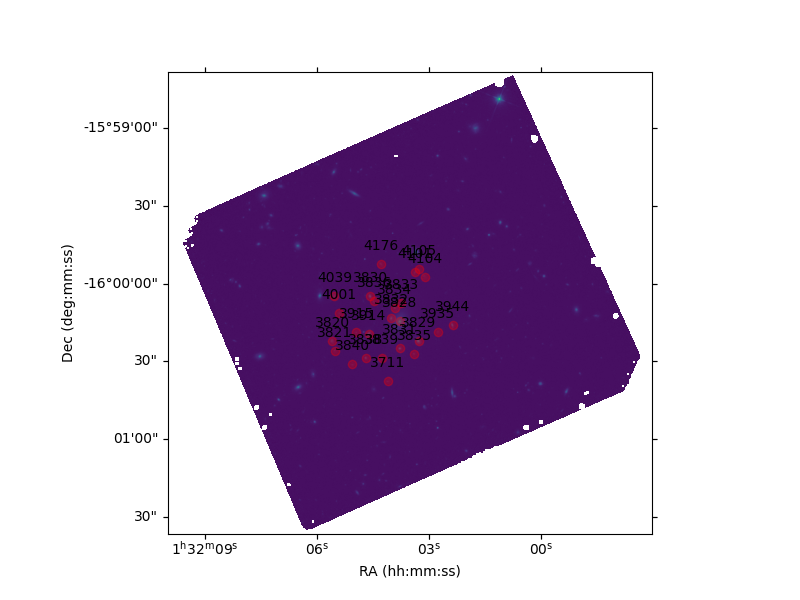

In [52]:
%matplotlib widget
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    data_legacy["RAJ2000"], data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy["objid"][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(
        f"{obj_id}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Add labels
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

plt.show()

In [54]:
# In degrees
center_x, center_y = 23.0166667, -16.0038889  # RA 01:32:04 DEC -16:00:14
radii = 25  # in arcsec
radii_deg = radii / 3600

x_upper, y_upper = center_x + radii_deg, center_y + radii_deg
x_lower, y_lower = center_x - radii_deg, center_y - radii_deg

x_limit_upper, y_limit_upper = wcs.all_world2pix(x_upper, y_upper, 0)
x_limit_lower, y_limit_lower = wcs.all_world2pix(x_lower, y_lower, 0)

print(x_limit_upper, x_limit_lower)

778.7747748771942 1379.5578117750529


In [55]:
data_legacy_cropped = data_legacy[(data_legacy["RAJ2000"] < x_upper) & (data_legacy["RAJ2000"] > x_lower) & (data_legacy["DEJ2000"] < y_upper) & (data_legacy["DEJ2000"] > y_lower)]


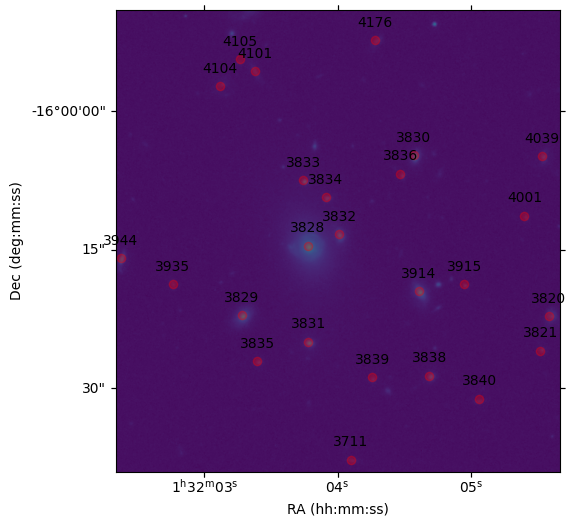

In [57]:
%matplotlib inline

wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")


x_scatter, y_scatter = wcs.all_world2pix(
    data_legacy_cropped["RAJ2000"], data_legacy_cropped["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy_cropped["objid"][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(
        f"{obj_id}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Add labels
# ax.invert_xaxis
ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

In [58]:
data_legacy.sort_values(by="objid")

# central deflector
central_deflector_id = 3828
object_ids = [central_deflector_id,
              3832, 3834, 3833, 3829, 3831, 3830, 3836, 3815]  

columns_to_drop = [
    "id",
    "release",
    "brickid",
    "fclean",
    "fqual"
]  # List of column names to drop
data_legacy_dropped = data_legacy.drop(columns=columns_to_drop)

selected_data_legacy = data_legacy_dropped[
    data_legacy_dropped["objid"].isin(object_ids)
]
selected_data_legacy.set_index("objid", inplace=True)

print(selected_data_legacy)

             _r    RAJ2000    DEJ2000 type  pstar gmmcomp  zphot  e_zphot
objid                                                                    
3828   0.000908  23.015735 -16.004042  DEV  0.038      D1  0.359    0.040
3829   0.003644  23.013675 -16.006127  REX  0.003      R4  0.451    0.060
3830   0.003438  23.019052 -16.001328  REX  0.004      R4  0.486    0.050
3831   0.003170  23.015742 -16.006932  REX  0.001      R4  0.536    0.058
3832   0.000191  23.016709 -16.003702  REX  0.000      R7  1.144    0.333
3833   0.002085  23.015590 -16.002080  REX  0.001      R6  0.837    0.081
3834   0.001353  23.016302 -16.002582  PSF  0.002      P7  0.611    0.319
3836   0.002761  23.018631 -16.001875  REX  0.000      R5  1.213    0.242


In [69]:
zphot_deflector = selected_data_legacy.loc[central_deflector_id, "zphot"]
del_z = 0.1 * (1 + zphot_deflector)
print("zphot_deflector:", zphot_deflector)
print("del_z:", del_z)
data_legacy_cropped_dropped = data_legacy_cropped.drop(columns=columns_to_drop)
data_legacy_cropped_dropped.set_index("objid", inplace=True)
# selected_data_legacy.set_index("objid", inplace=True)

not_neighbour_data_legacy = data_legacy_cropped_dropped[
    (data_legacy_cropped_dropped["zphot"] <= zphot_deflector - del_z) |
    (data_legacy_cropped_dropped["zphot"] >= zphot_deflector + del_z)
]

print(not_neighbour_data_legacy)

zphot_deflector: 0.359
del_z: 0.1359
             _r    RAJ2000    DEJ2000 type  pstar gmmcomp  zphot  e_zphot
objid                                                                    
3711   0.006597  23.017077 -16.010474  PSF  0.002      P9  0.715    0.319
3820   0.006744  23.023274 -16.006155  EXP  0.001      E5  0.966    0.117
3821   0.006940  23.023010 -16.007202  PSF  0.041      P5  0.772    0.536
3831   0.003170  23.015742 -16.006932  REX  0.001      R4  0.536    0.058
3832   0.000191  23.016709 -16.003702  REX  0.000      R7  1.144    0.333
3833   0.002085  23.015590 -16.002080  REX  0.001      R6  0.837    0.081
3834   0.001353  23.016302 -16.002582  PSF  0.002      P7  0.611    0.319
3835   0.004370  23.014146 -16.007525  PSF  0.004      P0  2.792    0.741
3836   0.002761  23.018631 -16.001875  REX  0.000      R5  1.213    0.242
3838   0.004910  23.019537 -16.007950  REX  0.001      R5  0.929    0.117
3839   0.004235  23.017747 -16.007995  REX  0.000      R7  1.227    0.219
3

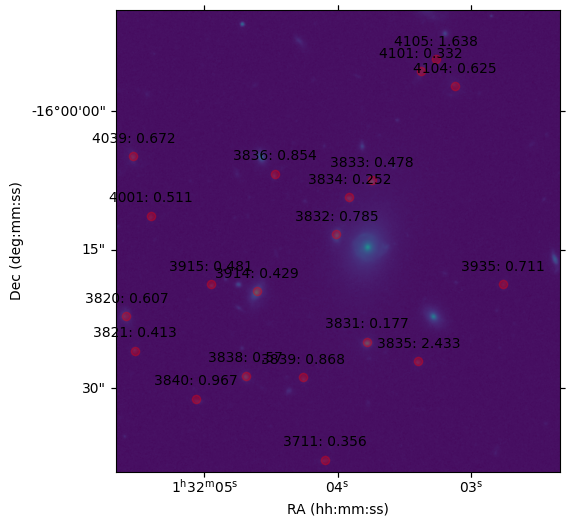

In [67]:
%matplotlib inline
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    not_neighbour_data_legacy["RAJ2000"], not_neighbour_data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = not_neighbour_data_legacy.index[i]  # Accessing the 'objid' column from your DataFrame
    zphot = not_neighbour_data_legacy.iloc[i]["zphot"]  
    plt.annotate(
        f"{obj_id}: {round(zphot - zphot_deflector, 3)}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)

ax.invert_xaxis()
# Add labels
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

plt.show()

## Save the Redshift data to the YAML file

In [16]:
# Existing YAML file with other parameters
existing_yaml_file = "DESIJ0132-1600_point_estimates.yml"

# Variables to include in the YAML file
z_phot = selected_data_legacy.loc[central_deflector_id,'zphot']
e_zphot = selected_data_legacy.loc[central_deflector_id,'e_zphot']

environment_variables = {
    "z_phot": [z_phot, e_zphot]
}

# make all the numpy variales to float
environment_variables = {
    key: [float(item) for item in value] if isinstance(value, list) else float(value)
    for key, value in environment_variables.items()
}

# Load existing YAML content if the file exists
existing_content = {}
try:
    with open(existing_yaml_file, "r") as file:
        existing_content = yaml.safe_load(file)
except FileNotFoundError:
    pass

# Update the existing content with new variables
existing_content.update(environment_variables)

# Write the updated content back to the YAML file
with open(existing_yaml_file, "w") as file:
    yaml.dump(existing_content, file, default_flow_style=False)